# Underfitting vs. Overfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import  metrics

Rozważmy następujący zbiór punktów:

In [2]:
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

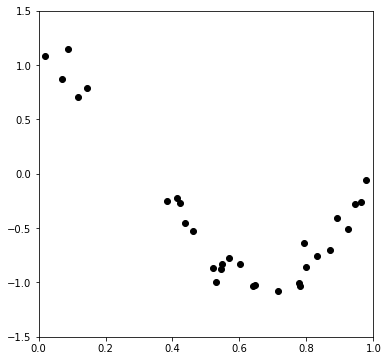

In [3]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X, y,  color='black')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Podziel dane na dwie grupy.

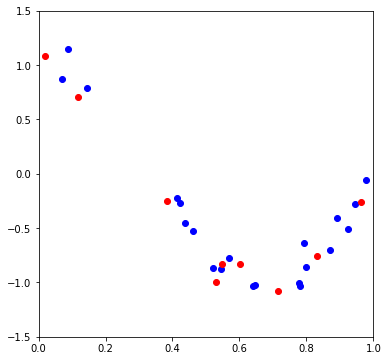

In [4]:
s=np.random.random_sample(n_samples)
s[s>0.2]=1
s[s<=0.2]=0
s
X1=X[s==1]
y1=y[s==1]
X2=X[s==0]
y2=y[s==0]

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200)
plt.show()
# dziele losowo na dwa kawałki, czerwone i niebieskie
# ucze na danych czerwonych i sprawdzam na niebieskich i odwrotnie

# Zadanie
Wykonaj regresję:
* liniową


In [5]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

-0.26539465669099105
0.07142264616393978


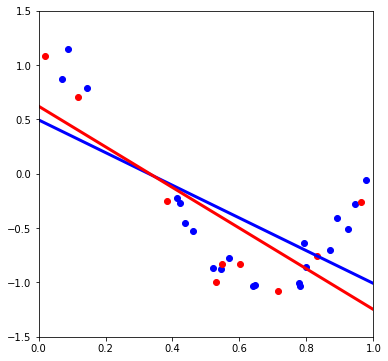

In [7]:
x_plot = np.vstack(np.linspace(0, 1, 100))

model1 = make_pipeline(PolynomialFeatures(1), LinearRegression())
model1.fit(np.vstack(X1), y1)

model2 = make_pipeline(PolynomialFeatures(1), LinearRegression())
model2.fit(np.vstack(X2), y2)

print( metrics.r2_score( model1.predict(np.vstack(X2)) , y2 ) )
print( metrics.r2_score( model2.predict(np.vstack(X1)) , y1 ) )

# model2.predict(X_test)

# Plot outputs

plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')

plt.plot(x_plot, model1.predict(x_plot), color='blue',linewidth=3)
plt.plot(x_plot, model2.predict(x_plot), color='red',linewidth=3)

x_tr = np.linspace(0, 1, 200)
plt.show()


# Zadanie
Wykonaj regresję:
* wielomianową stopnia $4$


0.9602922232016682
0.9430000812839192


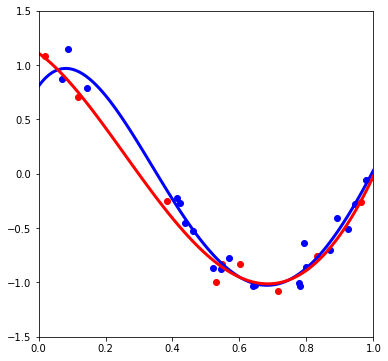

In [8]:
model1 = make_pipeline(PolynomialFeatures(4), LinearRegression())
model1.fit(np.vstack(X1), y1)

model2 = make_pipeline(PolynomialFeatures(4), LinearRegression())
model2.fit(np.vstack(X2), y2)

print( metrics.r2_score( model1.predict(np.vstack(X2)) , y2 ) )
print( metrics.r2_score( model2.predict(np.vstack(X1)) , y1 ) )

# model2.predict(X_test)

# Plot outputs

plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')

plt.plot(x_plot, model1.predict(x_plot), color='blue',linewidth=3)
plt.plot(x_plot, model2.predict(x_plot), color='red',linewidth=3)

x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj regresję:
* wielomianową stopnia $15$


-0.1275933050679845
-0.008973492707831099


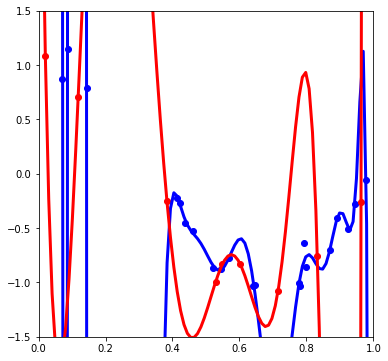

In [10]:
model1 = make_pipeline(PolynomialFeatures(15), LinearRegression())
model1.fit(np.vstack(X1), y1)

model2 = make_pipeline(PolynomialFeatures(15), LinearRegression())
model2.fit(np.vstack(X2), y2)

print( metrics.r2_score( model1.predict(np.vstack(X2)) , y2 ) )
print( metrics.r2_score( model2.predict(np.vstack(X1)) , y1 ) )

# model2.predict(X_test)

# Plot outputs

plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')

plt.plot(x_plot, model1.predict(x_plot), color='blue',linewidth=3)
plt.plot(x_plot, model2.predict(x_plot), color='red',linewidth=3)

x_tr = np.linspace(0, 1, 200)
plt.show()

In [ ]:
# chcemy puścic te petle 100 razy, 100 razy wylosowac próbke i mieć 100 wynikow na 1 wykresie, 
# w każdej pętli losujemy nowy podzial i sprawdzamy wyniki
# fit vstack mówi na czym uczymy nasz model, prodict vstack na czym testujemy - 
#  na tym wykresie chcemy mieć mozliwie prosta z małą wariancją, bez skokow - BIAS, VARIANCE